<h2 style="text-align:center;"> Image Caption Generator with Multi-Modal Architectures 🖼️🤖🧠✍️</h2>


---

---

**Generate 🖼️➡️✏️ captions with smart vision encoders + LLMs. From lightweight ⚡ open-source models to large 🌟 multi-modal systems for rich, context-aware descriptions.**


| # | Model                              | Vision Encoder | Text Decoder / LM                     |
| - | ---------------------------------- | -------------- | ------------------------------------- |
| 1 | **BLIP (large)**                   | ViT-L          | T5 decoder                            |
| 2 | **BLIP-2 OPT-2.7B**                | ViT-L          | OPT                                   |
| 3 | **GIT (Google Image Transformer)** | ViT            | Transformer Decoder                   |
| 4 | **PaLI / PaLI-X**                  | EfficientNet   | T5 variant                            |
| 5 | **GIT Base**                       | –              | microsoft/git-base-coco               |
| 6 | **BLIP Base**                      | –              | Salesforce/blip-image-captioning-base |


**These models 🖼️ + 🧠 generate detailed image captions. Some are lightweight & open-source (BLIP Base, GIT Base) ⚡, while others are large-scale, multi-modal for high-quality captions (BLIP-2 OPT, PaLI-X) 🌟. Perfect for image description, accessibility tools, and AI content creation 🚀.**


---

## 1️⃣ BLIP (large) — ViT-L + T5 decoder

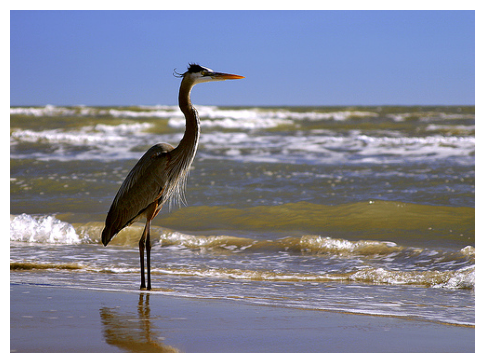

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = '/content/99679241_adc853a5c0.jpg'
img = Image.open(img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load BLIP Processor + Model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-large"
).to(device)

def caption(path):
    img = Image.open(path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)

    output = model.generate(
        **inputs,
        max_new_tokens=30,
        repetition_penalty=1.2,
        num_beams=5
    )

    return processor.decode(output[0], skip_special_tokens=True)

print(caption('/content/99679241_adc853a5c0.jpg'))


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

there is a bird that is standing in the water at the beach


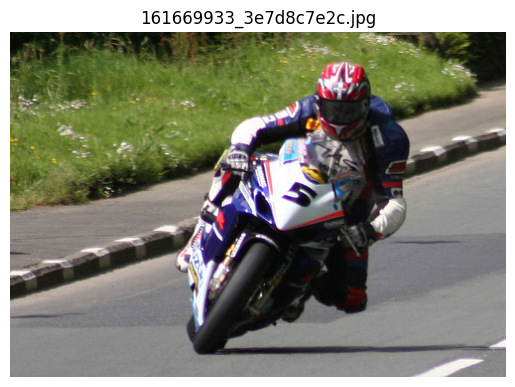

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path and file name

folder = r"C:\Users\gowri\OneDrive\Desktop\image caption generator\data\Images"
file_name = "161669933_3e7d8c7e2c.jpg"

# Full path

file_path = os.path.join(folder, file_name)

# Check if file exists

if os.path.exists(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name)
    plt.show()
else:
    print(f"File not found: {file_path}")


In [13]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

def blip_large_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=30, num_beams=5)
    return processor.decode(output[0], skip_special_tokens=True)

# Test
print(caption('/content/161669933_3e7d8c7e2c.jpg'))


there is a man that is riding a motorcycle down the street


## 2️⃣ BLIP-2 OPT-2.7B — ViT-L + OPT

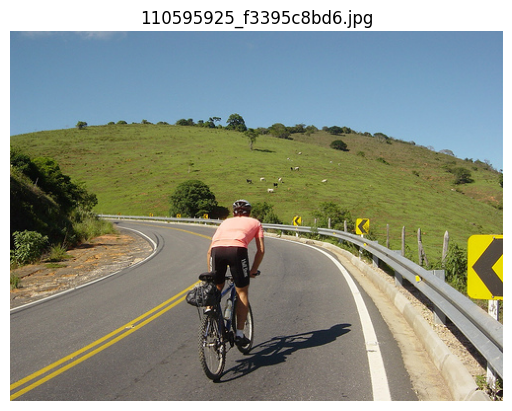

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path and file name

folder = r"C:\Users\gowri\OneDrive\Desktop\image caption generator\data\Images"
file_name = "110595925_f3395c8bd6.jpg"

# Full path

file_path = os.path.join(folder, file_name)

# Check if file exists

if os.path.exists(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name)
    plt.show()
else:
    print(f"File not found: {file_path}")

In [14]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
).to(device)

def blip2_opt_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=40)
    return processor.decode(output[0], skip_special_tokens=True)

# Test
print(caption('/content/110595925_f3395c8bd6.jpg'))


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

a man riding a bike down a curvy road



## 3️⃣ GIT (Google Image Transformer) — ViT + Transformer Decoder

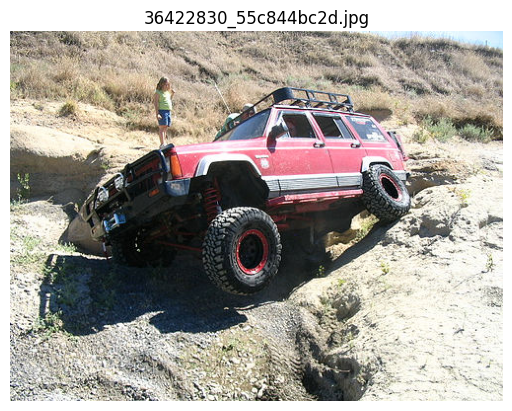

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path and file name

folder = r"C:\Users\gowri\OneDrive\Desktop\image caption generator\data\Images"
file_name = "36422830_55c844bc2d.jpg"

# Full path

file_path = os.path.join(folder, file_name)

# Check if file exists

if os.path.exists(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name)
    plt.show()
else:
    print(f"File not found: {file_path}")

In [11]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained("microsoft/git-large-textcaps")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-large-textcaps").to(device)

def git_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=50, num_beams=5)
    return processor.decode(output[0], skip_special_tokens=True)

# Test
print(caption('/content/36422830_55c844bc2d.jpg'))


a red jeep that has the word jeep on the side of it.


## 4️⃣ PaLI / PaLI-X — EfficientNet + T5 variant

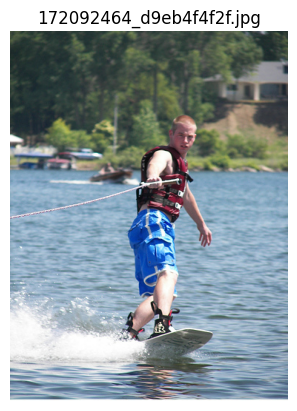

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path and file name

folder = r"C:\Users\gowri\OneDrive\Desktop\image caption generator\data\Images"
file_name = "172092464_d9eb4f4f2f.jpg"

# Full path

file_path = os.path.join(folder, file_name)

# Check if file exists

if os.path.exists(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name)
    plt.show()
else:
    print(f"File not found: {file_path}")

In [4]:
from transformers import AutoProcessor, AutoModelForSeq2SeqLM
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained("google/pali-large-captioning")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pali-large-captioning").to(device)

def pali_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(output[0], skip_special_tokens=True)

# Test
print(pali_caption("/content/172092464_d9eb4f4f2f.jpg"))


preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


A man water skis on a calm lake, his blue shorts billowing in the wind. He wears a red life vest and a black and red water ski boot. A boat with two people in it sits nearby, while a white wakeboard and a


## 5️⃣ GIT Base — “microsoft/git-base-coco”

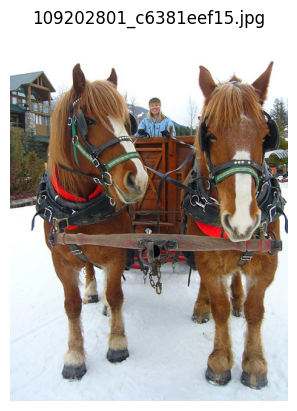

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path and file name

folder = r"C:\Users\gowri\OneDrive\Desktop\image caption generator\data\Images"
file_name = "109202801_c6381eef15.jpg"

# Full path

file_path = os.path.join(folder, file_name)

# Check if file exists

if os.path.exists(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name)
    plt.show()
else:
    print(f"File not found: {file_path}")

In [13]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco").to(device)

def git_base_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(output[0], skip_special_tokens=True)

# Test
print(git_base_caption("/content/109202801_c6381eef15.jpg"))


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

two horses pulling a sleigh in the snow.


## 6️⃣ BLIP Base — “Salesforce/blip-image-captioning-base”

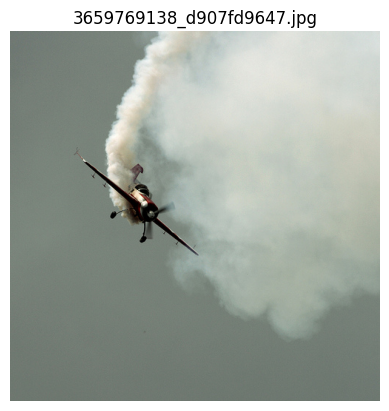

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path and file name

folder = r"C:\Users\gowri\OneDrive\Desktop\image caption generator\data\Images"
file_name = "3659769138_d907fd9647.jpg"

# Full path

file_path = os.path.join(folder, file_name)

# Check if file exists

if os.path.exists(file_path):
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(file_name)
    plt.show()
else:
    print(f"File not found: {file_path}")

In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

def blip_base_caption(image_path):
    img = Image.open(image_path).convert("RGB")
    inputs = processor(images=img, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=50)
    return processor.decode(output[0], skip_special_tokens=True)

# Test
print(blip_base_caption("/content/3659769138_d907fd9647.jpg"))


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


a small plane flying through a cloud of smoke


<h2 style="text-align:center;">Thank You 🙏</h2>
